In [2]:
%pip install openbb
%pip install sqlite_utils
from data import Data


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Gets singular stock
data = Data.get_price_data(symbol="META")
data

,date,open,high,low,close,volume,dividend
date,,,,,,,
2012-05-18,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0.0
2012-05-21,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0.0
2012-05-22,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0.0
2012-05-23,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0.0
2012-05-24,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0.0
...,...,...,...,...,...,...,...
2025-12-24,2025-12-24,662.530029,668.179993,662.200012,667.549988,5627500,0.0
2025-12-26,2025-12-26,668.059998,668.950012,661.320007,663.289978,7133800,0.0
2025-12-29,2025-12-29,658.010010,660.250000,654.390015,658.690002,8506500,0.0


In [ ]:
data.describe()

,open,high,low,close,volume,dividend
count,3425.000000,3425.000000,3425.000000,3425.000000,3.425000e+03,3425.000000
mean,220.898791,223.693293,218.067518,220.923425,2.833143e+07,0.001197
std,178.766240,180.826572,176.446406,178.632241,2.519075e+07,0.024751
min,18.080000,18.270000,17.549999,17.730000,4.726100e+06,0.000000
25%,95.680000,96.879997,93.949997,95.260002,1.482890e+07,0.000000
50%,172.500000,174.570007,170.500000,172.500000,2.095550e+07,0.000000
75%,286.010010,289.790009,281.160004,286.750000,3.223670e+07,0.000000
max,791.150024,796.250000,780.820007,790.000000,5.735764e+08,0.525000


In [12]:
pct_change = data["close"].pct_change()

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


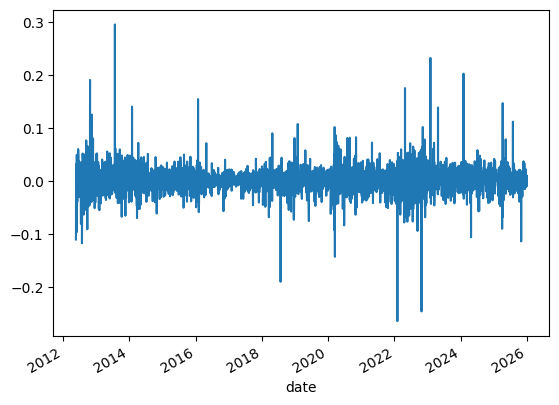

In [13]:
pct_change.plot()
plt.show()

In [14]:
pct_change.describe()

count    3424.000000
mean        0.001145
std         0.025018
min        -0.263901
25%        -0.010034
50%         0.000973
75%         0.012714
max         0.296115
Name: close, dtype: float64

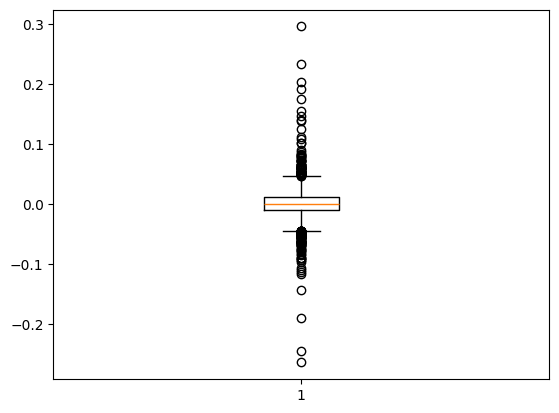

In [ ]:
pct_change = pct_change.dropna()
plt.boxplot(pct_change)
plt.show()

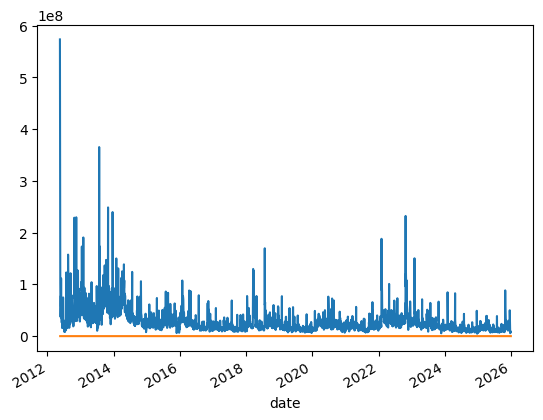

In [ ]:
data["volume"].plot()
data["close"].pct_change().plot()
plt.show()

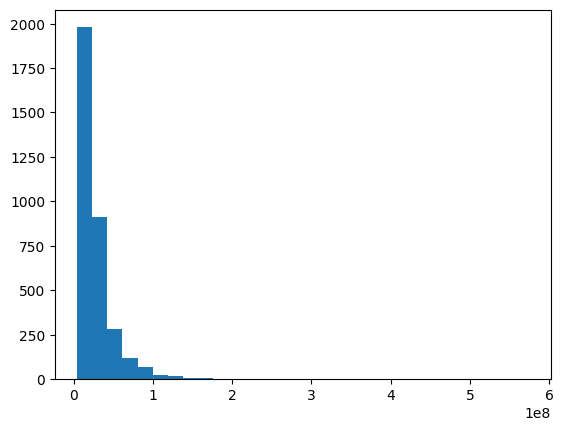

In [ ]:
plt.hist(data["volume"], bins=30)
plt.show()

In [50]:
import math

def transform_log(val):
  return math.log(val)

def transform_sqrt(val):
  return math.sqrt(val)

def transform_recip(val):
  return 1 / val

data["log_volume"] = data["volume"].map(transform_log)
data["sqrt_volume"] = data["volume"].map(transform_sqrt)
data["recip_volume"] = data["volume"].map(transform_recip)
print(data["log_volume"])

date
2012-05-18    20.167402
2012-05-21    18.940621
2012-05-22    18.438389
2012-05-23    18.114156
2012-05-24    17.732266
                ...    
2025-12-24    15.543176
2025-12-26    15.780355
2025-12-29    15.956341
2025-12-30    16.033354
2025-12-31    15.887474
Name: log_volume, Length: 3425, dtype: float64


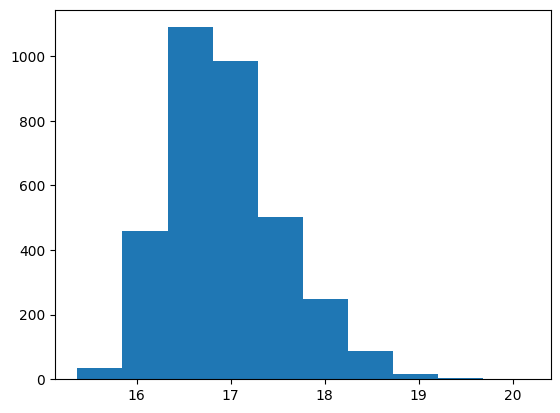

In [42]:
plt.hist(data["log_volume"])
plt.show()

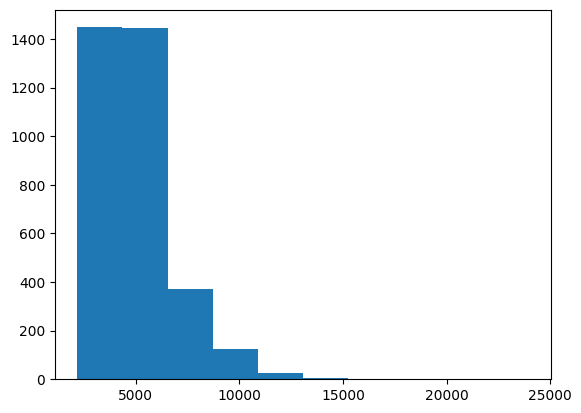

In [49]:
plt.hist(data["sqrt_volume"])
plt.show()

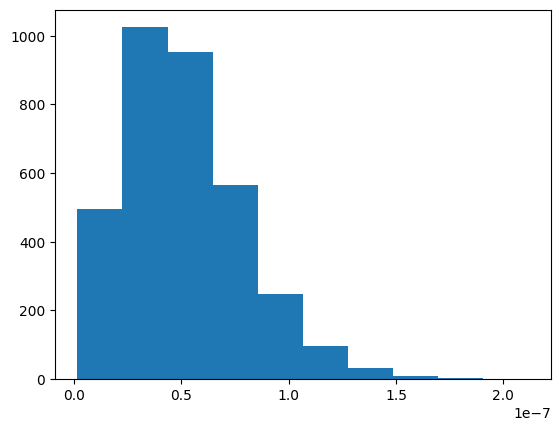

In [51]:
plt.hist(data["recip_volume"])
plt.show()

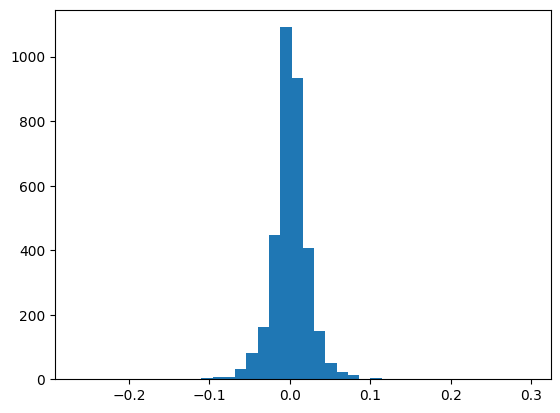

In [46]:
plt.hist(pct_change, bins=40)
plt.show()

In [55]:
%pip install scikit-learn
from sklearn.preprocessing import StandardScaler


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
scaler = StandardScaler()
data["pct_change"] = pct_change
data_scaled = scaler.fit_transform(data[["pct_change"]])
print(data_scaled)

[[        nan]
 [-4.43775548]
 [-3.60533006]
 ...
 [-0.32301709]
 [ 0.39485854]
 [-0.39754908]]


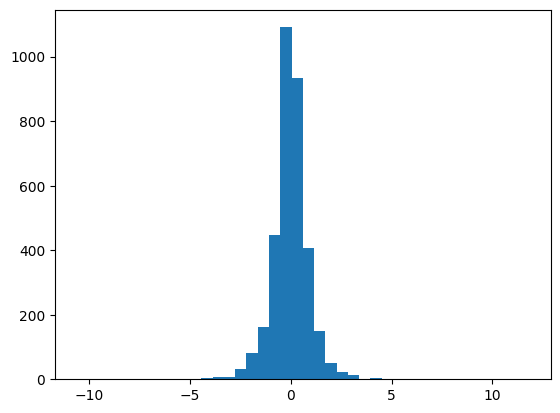

In [60]:
plt.hist(data_scaled, bins=40)
plt.show()

In [ ]:
data["pct_change_norm"] = data_scaled

In [ ]:
data["pct_change_norm"].describe()

count    3.424000e+03
mean    -7.263141e-18
std      1.000146e+00
min     -1.059588e+01
25%     -4.469069e-01
50%     -6.853636e-03
75%      4.624885e-01
max      1.179216e+01
Name: pct_change_norm, dtype: float64

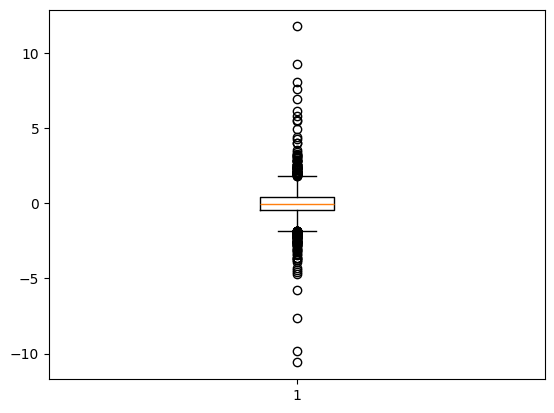

In [69]:
plt.boxplot(data["pct_change_norm"].dropna())
plt.show()

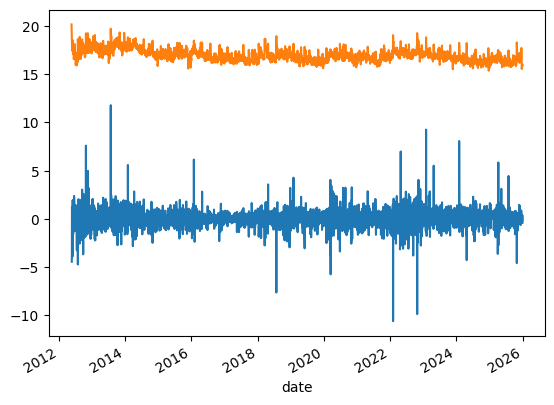

In [70]:
data["pct_change_norm"].plot()
data["log_volume"].plot()
plt.show()

In [71]:
data["pct_change_norm"].corr(data["log_volume"])

np.float64(0.020119247239111786)

In [72]:
data_scaled = scaler.fit_transform(data[["log_volume"]])
data["log_volume_norm"] = data_scaled

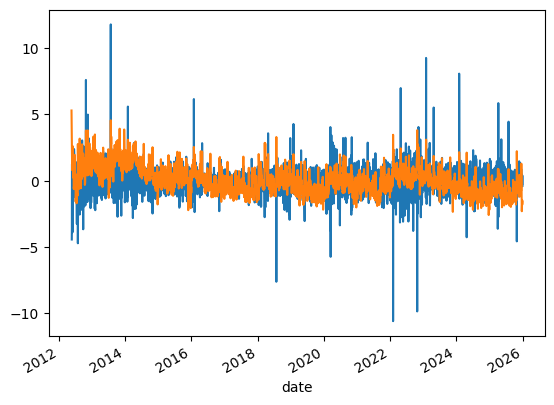

In [73]:
data["pct_change_norm"].plot()
data["log_volume_norm"].plot()
plt.show()

In [74]:
data["pct_change_norm"].corr(data["log_volume_norm"])

np.float64(0.020119247239111748)

In [75]:
data.describe()

,open,high,low,close,volume,dividend,transformed_volume,log_volume,sqrt_volume,recip_volume,pct_change,pct_change_norm,log_volume_norm
count,3425.000000,3425.000000,3425.000000,3425.000000,3.425000e+03,3425.000000,3425.000000,3425.000000,3425.000000,3.425000e+03,3424.000000,3.424000e+03,3.425000e+03
mean,220.898791,223.693293,218.067518,220.923425,2.833143e+07,0.001197,16.944316,16.944316,5023.980307,5.145986e-08,0.001145,-7.263141e-18,-1.560082e-15
std,178.766240,180.826572,176.446406,178.632241,2.519075e+07,0.024751,0.608626,0.608626,1758.394364,2.763166e-08,0.025018,1.000146e+00,1.000146e+00
min,18.080000,18.270000,17.549999,17.730000,4.726100e+06,0.000000,15.368611,15.368611,2173.959521,1.743447e-09,-0.263901,-1.059588e+01,-2.589331e+00
25%,95.680000,96.879997,93.949997,95.260002,1.482890e+07,0.000000,16.512089,16.512089,3850.831079,3.102054e-08,-0.010034,-4.469069e-01,-7.102723e-01
50%,172.500000,174.570007,170.500000,172.500000,2.095550e+07,0.000000,16.857912,16.857912,4577.717772,4.772017e-08,0.000973,-6.853636e-03,-1.419864e-01
75%,286.010010,289.790009,281.160004,286.750000,3.223670e+07,0.000000,17.288616,17.288616,5677.737225,6.743589e-08,0.012714,4.624885e-01,5.657836e-01
max,791.150024,796.250000,780.820007,790.000000,5.735764e+08,0.525000,20.167402,20.167402,23949.455109,2.115910e-07,0.296115,1.179216e+01,5.296448e+00


In [79]:
cleaned = data[["pct_change_norm", "log_volume_norm"]]
cleaned.dropna()

,pct_change_norm,log_volume_norm
date,,
2012-05-21,-4.437755,3.280498
2012-05-22,-3.605330,2.455188
2012-05-23,1.243828,1.922380
2012-05-24,1.241006,1.294827
2012-05-25,-1.401349,0.798888
...,...,...
2025-12-24,0.111148,-2.302472
2025-12-26,-0.300888,-1.912719
2025-12-29,-0.323017,-1.623523
